In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('/content/dados_gorjetas.csv')

print(df.head())
print()
print(df.info())
print()
print(df.isnull().sum())
df['Gorjeta'].describe()

   Conta_Total  Gorjeta     Genero Fumante  Dia Horario  Tamanho_Mesa  \
0         8.54     0.82  Masculino     Nao  Qui  Jantar             2   
1        16.11     4.77   Feminino     Sim  Sex  Almoco             6   
2        29.01     7.31   Feminino     Nao  Sab  Almoco             2   
3        20.70     5.75   Feminino     Sim  Qui  Jantar             2   
4         6.96     0.70  Masculino     Nao  Dom  Jantar             2   

   Avaliacao_Servico Possui_Criancas  Percentual_Esperado_Gorjeta  
0                  4             Nao                       0.1060  
1                  4             Nao                       0.2001  
2                  2             Nao                       0.2286  
3                  4             Nao                       0.2366  
4                  4             Nao                       0.1916  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column                       Non-Null Co

,Gorjeta
count,8000.000000
mean,4.192332
std,2.661967
min,0.500000
25%,2.400000
50%,3.610000
75%,5.320000
max,38.440000


In [3]:
colunas_categoricas = ['Genero', 'Fumante', 'Dia', 'Horario', 'Possui_Criancas']

# One-Hot Encoding
df_codificado = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

# Define X e y
X = df_codificado.drop('Gorjeta', axis=1)
y = df_codificado['Gorjeta']

numerical_cols = ['Conta_Total', 'Tamanho_Mesa', 'Avaliacao_Servico', 'Percentual_Esperado_Gorjeta']

In [4]:
def criar_modelo(input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

In [5]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

X_array = X.copy()
y_array = y.copy()

In [6]:
for fold, (train_index, test_index) in enumerate(kf.split(X_array), start=1):

    print(f"\n🔹 Fold {fold}")

    # Divisão dos folds
    X_train_fold = X_array.iloc[train_index].copy()
    X_test_fold = X_array.iloc[test_index].copy()
    y_train_fold = y_array.iloc[train_index]
    y_test_fold = y_array.iloc[test_index]

    # Escalonamento apenas dentro do fold
    scaler = StandardScaler()
    X_train_fold[numerical_cols] = scaler.fit_transform(X_train_fold[numerical_cols])
    X_test_fold[numerical_cols] = scaler.transform(X_test_fold[numerical_cols])

    # Criar novo modelo para este fold
    model = criar_modelo(input_dim=X_train_fold.shape[1])

    # Treino
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32)

    # Previsões
    y_pred = model.predict(X_test_fold).flatten()

    # Métricas do fold
    mae = mean_absolute_error(y_test_fold, y_pred)
    mse = mean_squared_error(y_test_fold, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_fold, y_pred)

    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    print(f"MAE:  {mae:.4f}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")



🔹 Fold 1
Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10.7276 - mean_absolute_error: 2.3378
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7287 - mean_absolute_error: 0.6450
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5209 - mean_absolute_error: 0.5585
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5111 - mean_absolute_error: 0.5366
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3986 - mean_absolute_error: 0.4952
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4013 - mean_absolute_error: 0.4927
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3835 - mean_absolute_error: 0.4758
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3867 - mean_absolute_error: 0.4754
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3724 - mean_absolute_error: 0.4708
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3624 - mean_absolute_error: 0.4650
Epoch 11/50
200/20

In [7]:
print("MAE por fold:", mae_scores)
print("MSE por fold:", mse_scores)
print("RMSE por fold:", rmse_scores)
print("R² por fold:", r2_scores)

print(f"\nMAE - Erro Absoluto Médio: {np.mean(mae_scores):.4f}")
print(f"MSE - Erro Quadrático Médio: {np.mean(mse_scores):.4f}")
print(f"RMSE - Raiz do Erro Quadrático Médio: {np.mean(rmse_scores):.4f}")
print(f"R² - Coeficiente de Determinação: {np.mean(r2_scores):.4f}")

MAE por fold: [0.4699705123826861, 0.46107789581418035, 0.4655737221419811, 0.46155091615468263, 0.45764267726540564]
MSE por fold: [0.35776869377221887, 0.3405959976105249, 0.3568166536686086, 0.3629427265033921, 0.33732924240877776]
RMSE por fold: [np.float64(0.5981376879717737), np.float64(0.5836060294501119), np.float64(0.597341320911762), np.float64(0.6024472810988462), np.float64(0.5808005186023664)]
R² por fold: [0.9428916012279651, 0.9480919617618027, 0.9509677629680267, 0.9564190932686316, 0.9516719339704544]

MAE - Erro Absoluto Médio: 0.4632
MSE - Erro Quadrático Médio: 0.3511
RMSE - Raiz do Erro Quadrático Médio: 0.5925
R² - Coeficiente de Determinação: 0.9500


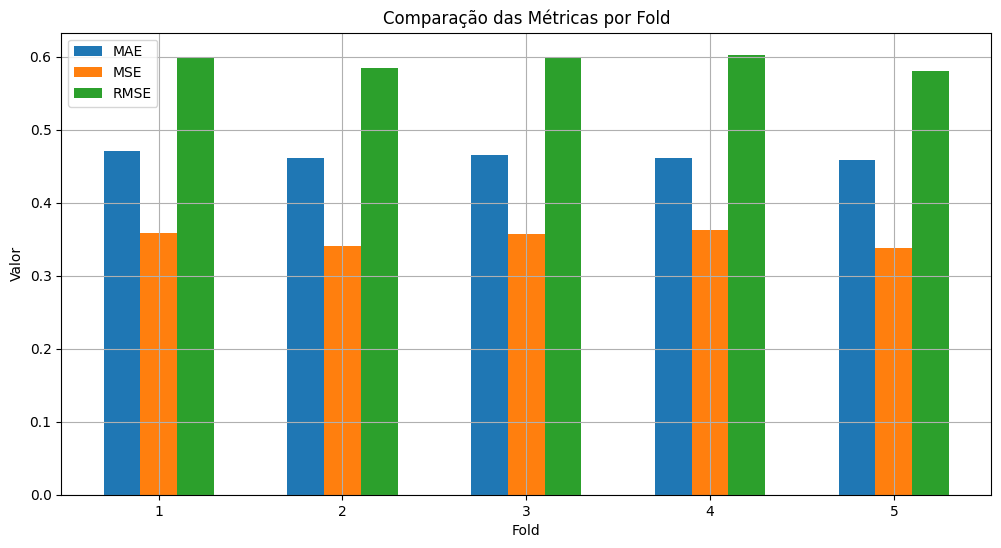

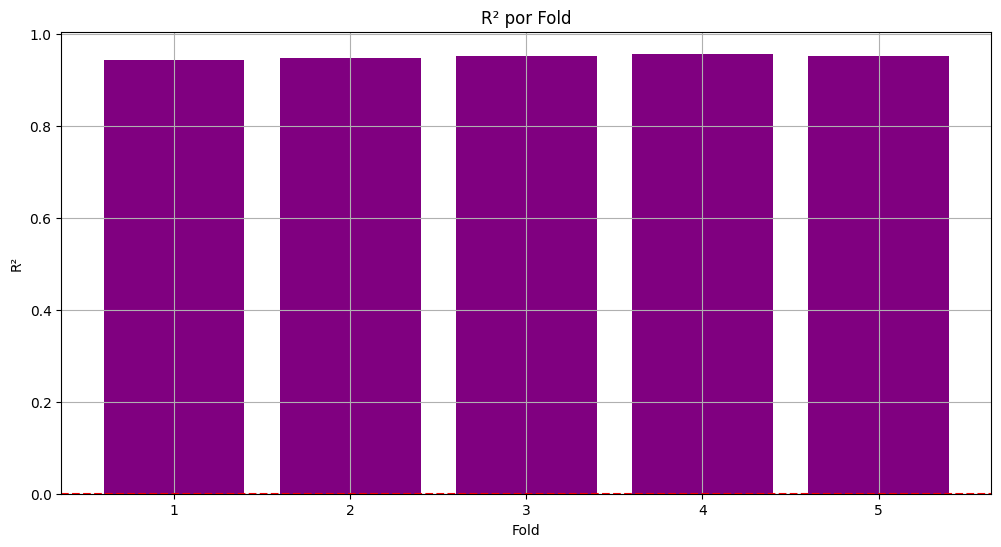

In [8]:
import matplotlib.pyplot as plt

folds = range(1, kf.n_splits + 1)

plt.figure(figsize=(12,6))
width = 0.2

plt.bar([f - width for f in folds], mae_scores, width=0.2, label="MAE")
plt.bar(folds, mse_scores, width=0.2, label="MSE")
plt.bar([f + width for f in folds], rmse_scores, width=0.2, label="RMSE")

plt.title("Comparação das Métricas por Fold")
plt.xlabel("Fold")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(folds, r2_scores, color='purple')
plt.title("R² por Fold")
plt.xlabel("Fold")
plt.ylabel("R²")
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()